<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/ML_kmeans_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clusters Visualization

In [3]:
cluster1 = pd.DataFrame(np.random.randn(1000, 2) + (15, 15))
cluster1.rename(columns = {0 : 'x', 1 : 'y'}, inplace = True)

In [4]:
cluster2 = pd.DataFrame(np.random.randn(1000, 2) + (20, 10))
cluster2.rename(columns = {0 : 'x', 1 : 'y'}, inplace = True)

In [5]:
cluster3 = pd.DataFrame(np.random.randn(1000, 2) + (25, 20))
cluster3.rename(columns = {0 : 'x', 1 : 'y'}, inplace = True)

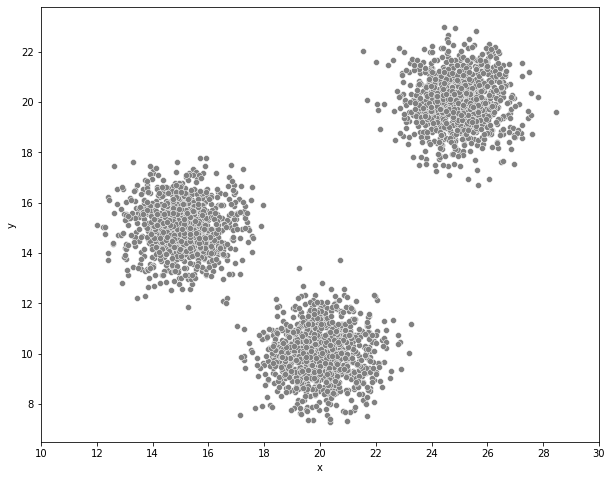

In [54]:
plt.figure(figsize=(10, 8))
red_patch = sns.scatterplot(x = 'x', y = 'y', data = cluster1, color = 'gray')
blue_patch = sns.scatterplot(x = 'x', y = 'y', data = cluster2, color = 'gray')
green_patch = sns.scatterplot(x = 'x', y = 'y', data = cluster3, color = 'gray')

plt.xticks(np.arange(10, 32, step=2))
plt.show()

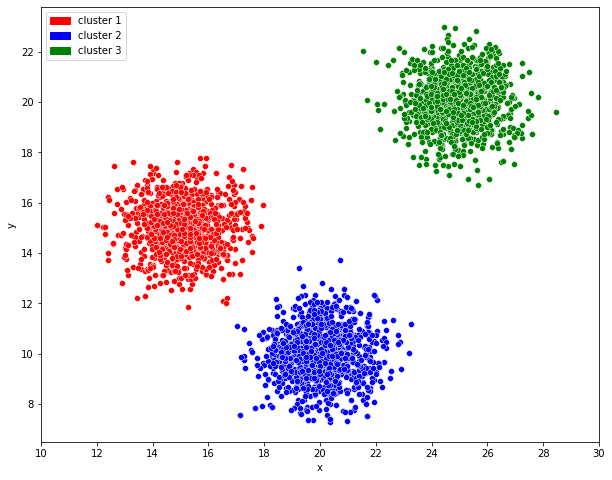

In [43]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 8))
red_patch = sns.scatterplot(x = 'x', y = 'y', data = cluster1, color = 'red')
blue_patch = sns.scatterplot(x = 'x', y = 'y', data = cluster2, color = 'blue')
green_patch = sns.scatterplot(x = 'x', y = 'y', data = cluster3, color = 'green')

plt.xticks(np.arange(10, 32, step=2))

red_patch = mpatches.Patch(color='red', label='cluster 1')
blue_patch = mpatches.Patch(color='blue', label='cluster 2')
green_patch = mpatches.Patch(color='green', label='cluster 3')
plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper left')

plt.show()

# Create data points

In [25]:
df = pd.concat([cluster1, cluster2, cluster3])
df

,x,y
0,14.575278,15.406339
1,14.676003,14.478024
2,15.858222,13.781335
3,13.886809,14.881163
4,15.002885,15.228663
...,...,...
995,24.968705,21.213374
996,23.747450,19.429555
997,24.653672,20.128844
998,25.465808,22.195158


# Visualize data points on 2D plot

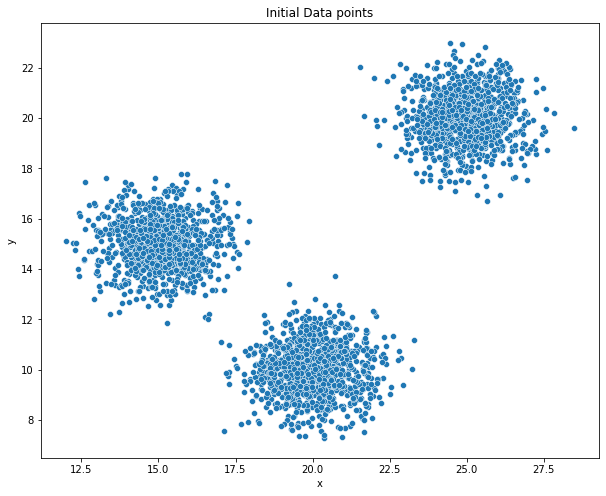

In [62]:
# visualize data point
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'x', y = 'y', data = df)
plt.title('Initial Data points')
plt.show()

# K-means clustering

In [29]:
# convert dataframe to numpy array
data_points = df.values

In [30]:
kmeans = KMeans(n_clusters=3).fit(data_points)

In [31]:
# cluster id for each data point
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [32]:
# this is final centroids position
kmeans.cluster_centers_

array([[20.01672776, 10.0122645 ],
       [24.98352341, 19.98815138],
       [15.05299516, 15.0349321 ]])

In [33]:
df['cluster_labels'] = kmeans.labels_

In [34]:
df.head(12)

,x,y,cluster_labels
0,14.575278,15.406339,2
1,14.676003,14.478024,2
2,15.858222,13.781335,2
3,13.886809,14.881163,2
4,15.002885,15.228663,2
5,14.365673,14.722919,2
6,14.483532,12.860978,2
7,13.560526,13.581010,2
8,13.178743,15.421744,2
9,15.245516,14.814902,2


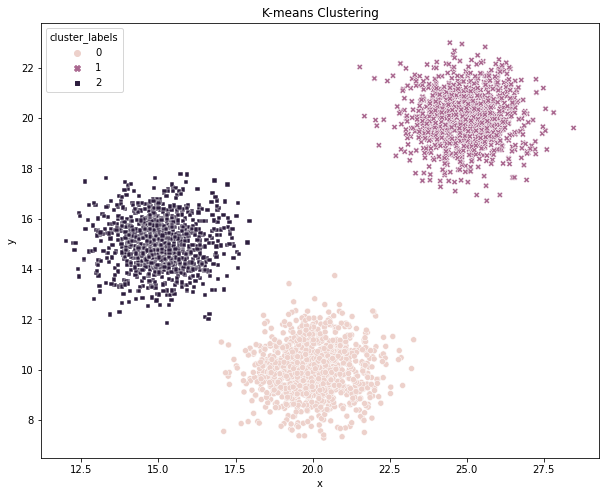

In [63]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'x', y = 'y', data = df, hue="cluster_labels", style='cluster_labels')
plt.title('K-means Clustering')
plt.show()